<a href="https://colab.research.google.com/github/veeraprathp/WineCutomers_Classifiaction/blob/main/Customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component analysis

Importing the dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [79]:
dataset = pd.read_csv('/content/Wine.csv')
x= dataset.iloc[:,:].values
y= dataset.iloc[:,-1].values

splitting the dataset into  test and train set

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
print(X_train)

[[ 13.69   3.26   2.54 ...   1.82 680.     3.  ]
 [ 12.69   1.53   2.26 ...   2.06 495.     2.  ]
 [ 11.62   1.99   2.28 ...   2.96 345.     2.  ]
 ...
 [ 12.42   1.61   2.19 ...   2.96 345.     2.  ]
 [ 13.9    1.68   2.12 ...   3.33 985.     1.  ]
 [ 14.16   2.51   2.48 ...   1.71 660.     3.  ]]


Feature scaling

In [82]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

In [83]:
print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ... -1.06412236 -0.2059076
   1.30503589]
 [-0.36659076 -0.7581304  -0.39779858 ... -0.73083231 -0.81704676
   0.02700074]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.51900537 -1.31256499
   0.02700074]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.51900537 -1.31256499
   0.02700074]
 [ 1.13777093 -0.62316862 -0.91876272 ...  1.03282752  0.80164614
  -1.2510344 ]
 [ 1.4610222   0.12361993  0.42085937 ... -1.2168803  -0.2719767
   1.30503589]]


Applying PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [85]:
print(X_train)

[[-2.50755982 -1.06733167]
 [-1.65371963  1.5900792 ]
 [ 0.98941063  2.21326078]
 [-2.87306514 -1.65574455]
 [ 2.21722377  0.23990321]
 [ 2.86504055 -1.38353933]
 [ 0.79453974  2.25023768]
 [-0.38698869  2.35651859]
 [-0.28780729  2.27809899]
 [ 2.45725227 -1.10488853]
 [-3.24663051 -0.23749076]
 [ 1.77765059  1.24057746]
 [-2.52059628 -0.97283778]
 [ 2.52925651 -2.39964244]
 [-2.63932186 -0.20138145]
 [-3.26182511 -0.26871879]
 [ 2.8987037  -0.8763784 ]
 [-1.55373026 -3.5426708 ]
 [ 2.92480637 -0.00940831]
 [ 0.16345263  2.28964951]
 [-2.99918379 -2.58167881]
 [-2.85787117 -0.44632039]
 [ 1.62740663  0.83261939]
 [-3.05845182 -0.42363393]
 [-3.15481719 -1.86719031]
 [ 1.75288376  0.04128941]
 [-2.2377329   0.11029164]
 [-2.59505922  0.51102076]
 [ 1.07709649  2.49286983]
 [-2.11185638  1.32001586]
 [-2.84043862 -0.54492042]
 [ 0.15488611  1.29043724]
 [ 2.85884143 -1.18221786]
 [-0.70342448  3.16533611]
 [ 2.29319944 -0.11620032]
 [-0.48401491  0.57853718]
 [ 0.99706014 -0.37188445]
 

Traing the Logistic Regression model on the Training set

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

**Confusion matrix**

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

Visulaising the results

<ipython-input-89-f2bb73564e74>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


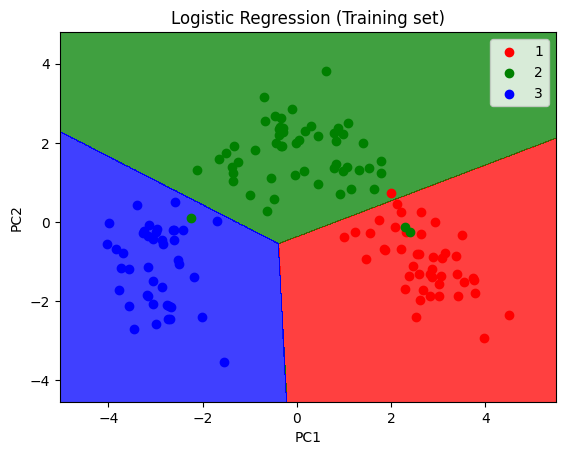

In [89]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Visulaising the test set results

<ipython-input-90-e8bd190f7101>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


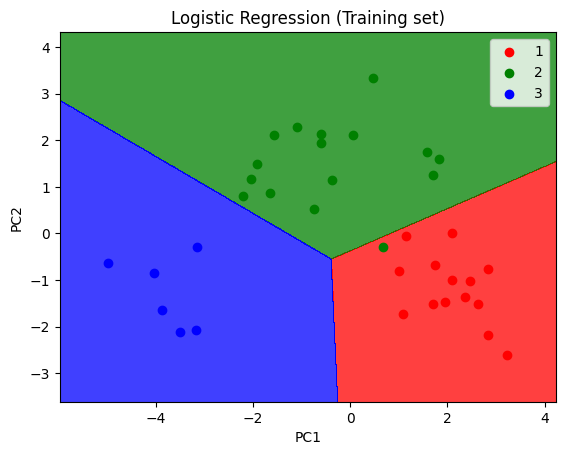

In [90]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()